1. Descripción del Conjunto de Datos:


Breve descripción de cada conjunto de datos, incluyendo la fuente, el tamaño y las variables.

Fuente: https://www.kaggle.com/datasets/arpit2712/digital-marketing-company

Tamaño: 1.11 MB

Análisis de marketing digital


Este conjunto de datos ofrece una visión en profundidad de las interacciones con los clientes y el rendimiento de las campañas en el ámbito del marketing digital. Incluye métricas clave e información demográfica que son cruciales para analizar la eficacia del marketing y la interacción con los clientes.

Inclye datos de:

Identificación del cliente

Edad

Género

Ingreso

Canal de campaña

Tipo de campaña

Gasto publicitario


Tasa de clics (CTR)

Tasa de conversión

Visita al sitio web

Páginas por visita

Tiempo en el sitio web

Cantidad de compartido en redes sociales

Email abierto

Clics en email

Compras anteriores


Puntos de fidelidad

Publicidad en plataforma

Herramienta de publicidad


Conversion



Parte 1: Preprocesamiento de Datos

1. Limpieza de Datos:


- Tratar los valores nulos utilizando técnicas adecuadas (imputación, eliminación, etc.).


In [1]:
import numpy as np
import pandas as pd

url = 'https://drive.google.com/uc?id=1eXtrSBO-liURziQ5AjMip1rXnd5nQt2X&export=download'
df = pd.read_csv(url)
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [2]:
df.tail()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1
7999,15999,31,Female,93002,Email,Awareness,7743.627070,0.185670,0.057228,15,6.964739,12.763660,2,18,9,9,341,IsConfid,ToolConfid,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [4]:
df.describe().round(3)

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000
mean,11999.500,43.626,84664.197,5000.945,0.155,0.104,24.752,5.549,7.728,49.800,9.477,4.467,4.486,2490.268,0.876
std,2309.545,14.903,37580.388,2838.038,0.084,0.055,14.312,2.607,4.228,28.901,5.711,2.857,2.888,1429.527,0.329
min,8000.000,18.000,20014.000,100.055,0.010,0.010,0.000,1.000,0.502,0.000,0.000,0.000,0.000,0.000,0.000
25%,9999.750,31.000,51744.500,2523.221,0.083,0.056,13.000,3.302,4.068,25.000,5.000,2.000,2.000,1254.750,1.000
50%,11999.500,43.000,84926.500,5013.440,0.155,0.104,25.000,5.534,7.683,50.000,9.000,4.000,4.000,2497.000,1.000
75%,13999.250,56.000,116815.750,7407.989,0.228,0.152,37.000,7.836,11.481,75.000,14.000,7.000,7.000,3702.250,1.000
max,15999.000,69.000,149986.000,9997.915,0.300,0.200,49.000,9.999,14.995,99.000,19.000,9.000,9.000,4999.000,1.000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Income,0
CampaignChannel,0
CampaignType,0
AdSpend,0
ClickThroughRate,0
ConversionRate,0
WebsiteVisits,0


Verificación de las variables catégoricas

In [7]:
for columna in df.columns:
  print(f'Valores únicos en la columna {columna}:\n{df[columna].unique()}\n')

Valores únicos en la columna CustomerID:
[ 8000  8001  8002 ... 15997 15998 15999]

Valores únicos en la columna Age:
[56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63]

Valores únicos en la columna Gender:
['Female' 'Male']

Valores únicos en la columna Income:
[136912  41760  88456 ...  24849 125471 107862]

Valores únicos en la columna CampaignChannel:
['Social Media' 'Email' 'PPC' 'Referral' 'SEO']

Valores únicos en la columna CampaignType:
['Awareness' 'Retention' 'Conversion' 'Consideration']

Valores únicos en la columna AdSpend:
[6497.870068 3898.668606 1546.429596 ... 4609.534635 9476.106354
 7743.62707 ]

Valores únicos en la columna ClickThroughRate:
[0.04391851 0.15572507 0.27749037 ... 0.05652592 0.02396129 0.1856701 ]

Valores únicos en la columna ConversionRate:
[0.08803141 0.18272468 0.07642272 ... 0.13382612 0.13838618 0.05722808]

Valores únicos en la columna 

- Manejar los outliers mediante técnicas de filtrado o transformación.

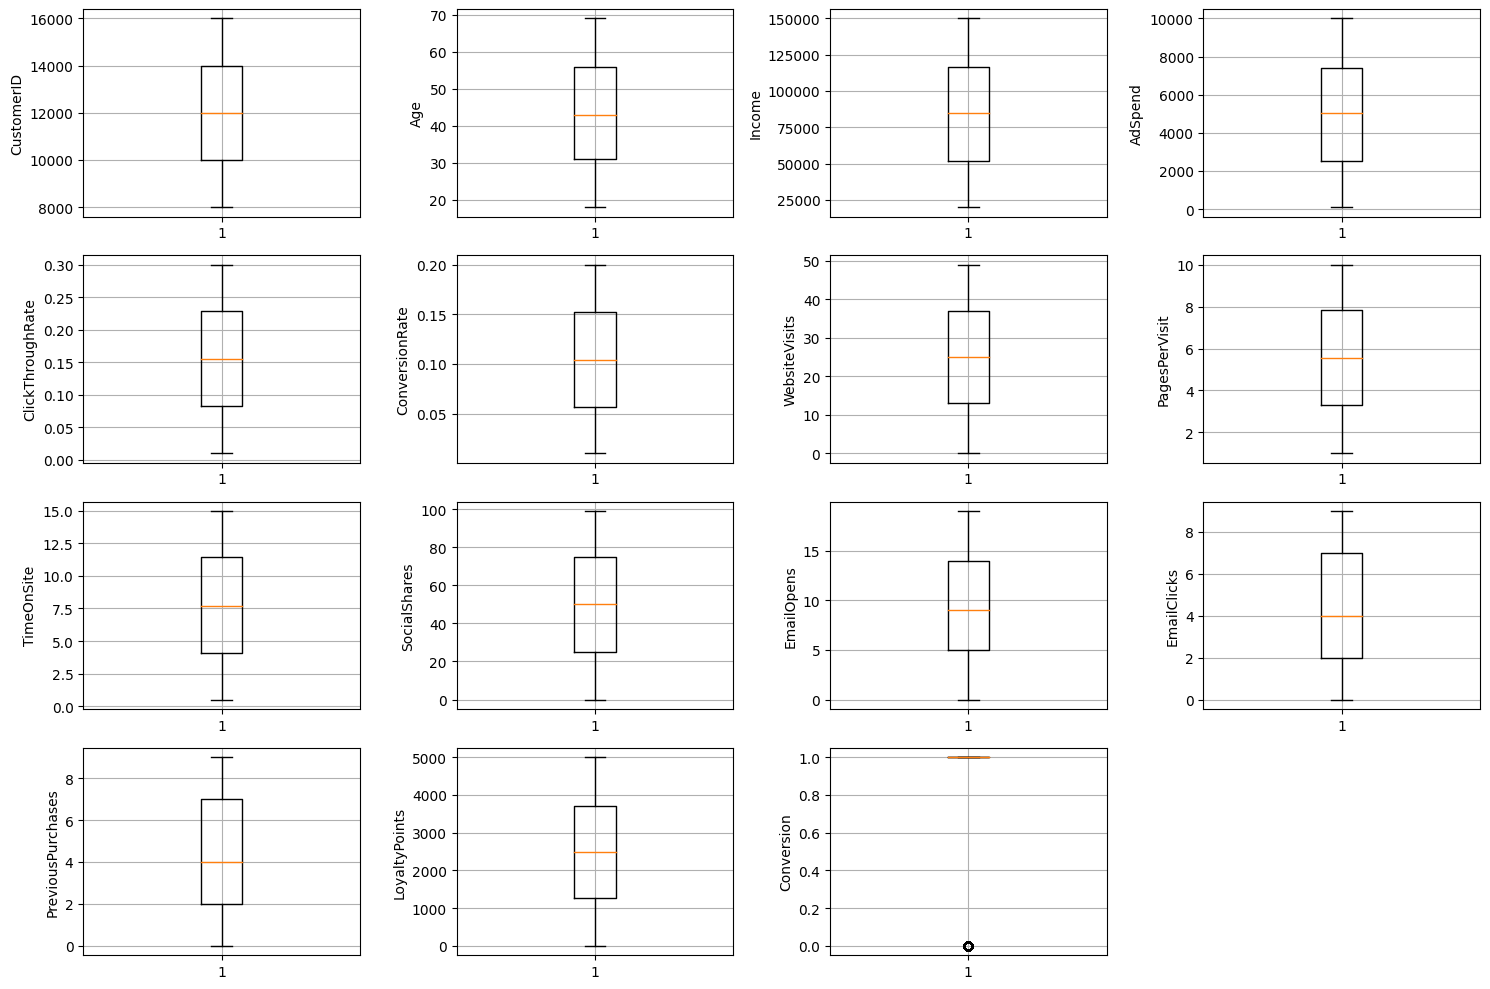

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
columnas = df.select_dtypes([np.number]).columns
n = 1
plt.figure(figsize=(15,10), dpi=100)
for columna in columnas:
  plt.subplot(4,4,n)
  n = n+1
  plt.ylabel(columna)
  plt.boxplot(df[columna])
  plt.grid(True)
  plt.tight_layout()

Se evidencia comportamiento normal de los datos, sin presencia de datos atípicos.

Visualización del comportamiento de los datos

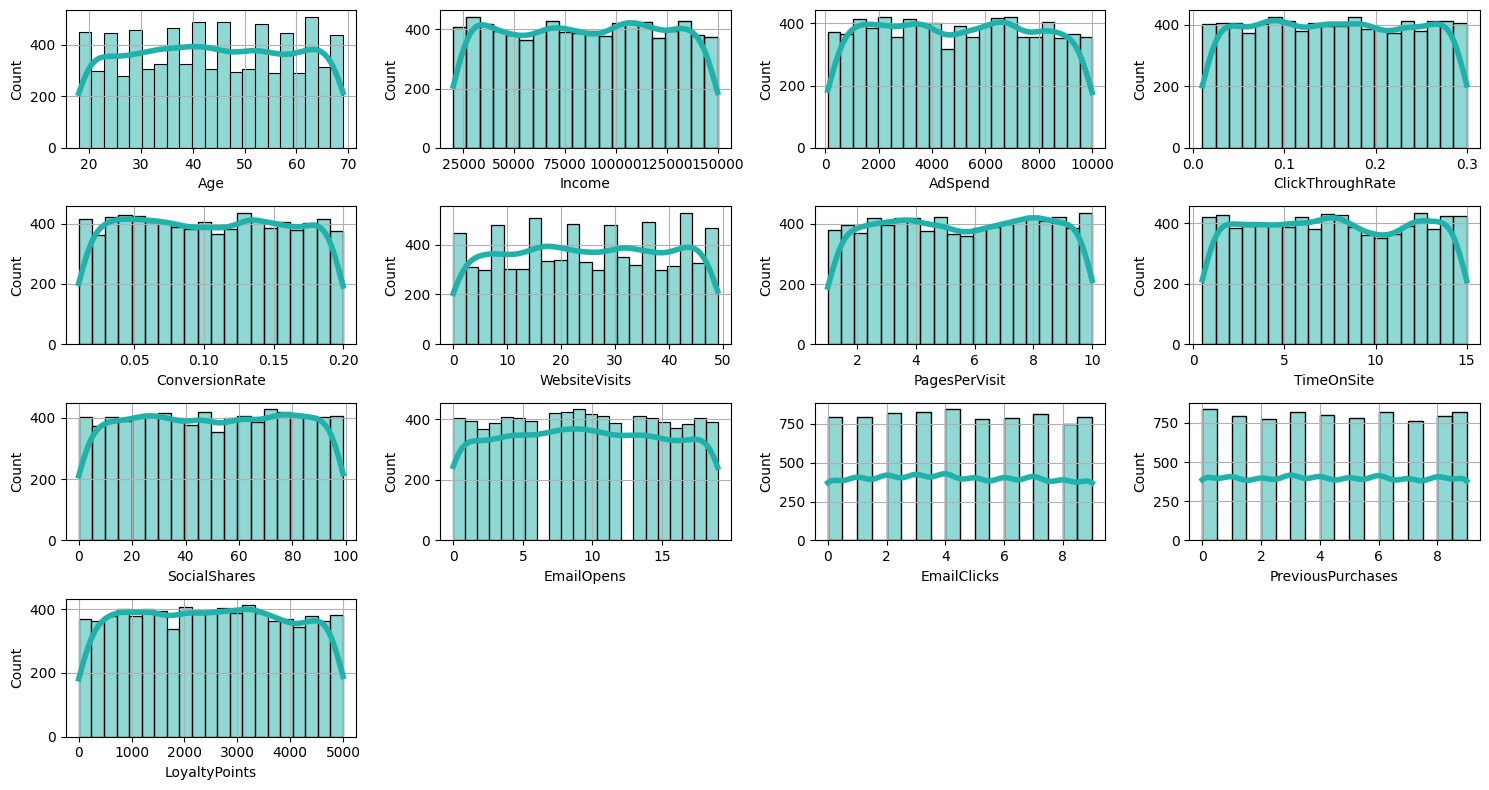

In [9]:
columnas = df.select_dtypes(include=['float64', 'int']).columns
columnas = columnas.drop(['Conversion', 'CustomerID'])

n = 1
plt.figure(figsize=(15,8), dpi=100)
for columna in columnas:
  plt.subplot(4,4,n)
  n = n+1
  sns.histplot(df, x = columna, stat = 'count', kde=True, color= 'lightseagreen', line_kws = {'linewidth': 4})
  plt.grid(True)
  plt.tight_layout()

'Age': se evidencia una interacción con las campañas publicitarias de manera uniforme en el rango de edad desde 20 hasta 70 años.

'Income': comportamiento multimodal, con diversos ingresos lo que indica que hay clientes con diferentes capacidades económicas.

'AdSpend': comportamiento multimodal, se aprecia inversiones desde los 500 aproximadamente hasta los 10000 con fuerte crecimiento al pago por publicidad.

'ClickThorughRate': la medición de la proporción de la frecuencia con la que las personas ven un anuncio es grande hay mucho movimiento hacia la página.

'Conversion Rate': refleja el éxito de una campaña, se puede visualizar un comportamiento simétrico con una creciente respuesta por parte de los clientes.

'Websites Visits' medida del engagement e interés con una tendencia multimodal.

'PagesprVisit': comportamiento bimodal.

'TimeOnSite': comportamiento multimodal.

'SocialShares': comportamiento bimodal.

Para las siguientes columnas se puede pareciar un comportamiento multimodal.

2. Transformación de Columnas:


- Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.


- Realizar codificación de variables categóricas utilizando técnicas como One-Hot Encoding.


- Escalar las variables numéricas usando StandardScaler u otros métodos de normalización.

In [10]:
pip install optuna

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

In [12]:
# Dividir target y eliminar columnas irrelevantes
df_muestra =  df.sample(frac=0.2, random_state=42)
X_muestra = df_muestra.drop(['Conversion'], axis=1)  # Eliminamos Customer ID del DataFrame
y_muestra = df_muestra['Conversion']

In [13]:
#Preparación de datos: Divide los datos en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%).
# Dividir los datos en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_muestra, y_muestra, test_size = 0.3, random_state= 31)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [15]:
#Definir las columnas numéricas y categóricas.

numeric_features = ['CustomerID','Age','Income', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'AdSpend']

categorical_features = ['Gender','CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']

# creación de un Pipeline para columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'median')), # relleno de faltantes si es que los hay
    ('scaler', StandardScaler()) # Escalado de las categorías numéricas
])


In [16]:
# Creación de un Pipeline para columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('nominal', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding de las categóricas
])

In [17]:
# Usar ColumnTransformer para aplicar las transformaciones a las columnas correctas
preprocessor = ColumnTransformer(
    transformers=[
        ('numerica', numeric_transformer, numeric_features),
        ('categorica', categorical_transformer, categorical_features)
    ],
   remainder='passthrough', # Dejar columnas no transformadas
   n_jobs= -1,
    verbose= True,
    sparse_threshold= 0.3
)

preprocessor

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('numerica',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['CustomerID', 'Age', 'Income',
                                  'ClickThroughRate', 'ConversionRate',
                                  'WebsiteVisits', 'PagesPerVisit',
                                  'TimeOnSite', 'SocialShares', 'EmailOpens',
                                  'EmailClicks', 'PreviousPurchases',
                                  'LoyaltyPoints', 'AdSpend']),
                                ('categorica',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'CampaignChannel', 'CampaignType',
                                  'AdvertisingPlatform', 'AdvertisingTool'])],
                  verbose=True)

In [18]:
pip install lazypredict

2. Comparación de Modelos:


Comparar los modelos utilizando métricas de rendimiento relevantes (exactitud, precisión, recall, F1-Score, ROC-AUC, etc.).


Seleccionar la técnica de machine learning más adecuada basándose en las métricas y la naturaleza del problema.

In [19]:
from lazypredict.Supervised import LazyClassifier
lazy = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy.fit(X_train, X_test, y_train, y_test)
data = pd.DataFrame(models)
data.head()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 97%|█████████▋| 28/29 [00:10<00:00,  1.24it/s]

[LightGBM] [Info] Number of positive: 986, number of negative: 134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2310
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.880357 -> initscore=1.995817
[LightGBM] [Info] Start training from score 1.995817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:10<00:00,  2.74it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.67,0.73,0.73,0.73,0.09
XGBClassifier,0.91,0.70,0.70,0.90,2.97
BaggingClassifier,0.88,0.68,0.68,0.88,0.30
AdaBoostClassifier,0.89,0.63,0.63,0.87,0.60
DecisionTreeClassifier,0.84,0.63,0.63,0.84,0.08


Parte 3: Optimización de Hiperparámetros

GridSearchCV:


Implementar GridSearchCV para realizar una búsqueda exhaustiva de los mejores hiperparámetros para el modelo seleccionado.


Definir el espacio de búsqueda para los hiperparámetros relevantes.


RandomizedSearchCV:


Implementar RandomizedSearchCV para realizar una búsqueda aleatoria de los mejores hiperparámetros, especialmente útil si el espacio de búsqueda es grande.


Optuna:


Implementar Optuna para una optimización avanzada de los hiperparámetros, aprovechando técnicas como la optimización bayesiana y el pruning.


Evaluación de Modelos Optimizados:


Entrenar el modelo con los mejores hiperparámetros encontrados y evaluar su rendimiento en el conjunto de prueba.


Comparar el rendimiento del modelo optimizado con el modelo inicial.

## **Modelos de Clasificación**

- # Decision Tree Classifier

In [20]:
# Deifnición del modelo Árbol de Decisión

arbol_modelo = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('modelo', DecisionTreeClassifier())
])

parametros = {
    'modelo__max_depth': [None, 10, 20, 30],
          'modelo__min_samples_split': range(2, 21),
          'modelo__min_samples_leaf': range(1, 11)
}


In [21]:
# Gridsearch

g_A = GridSearchCV(arbol_modelo, parametros, cv=3, n_jobs= -1, scoring='accuracy')

g_A.fit(X_train,y_train)

# Randomized SearchCV

R_A = RandomizedSearchCV(arbol_modelo, parametros, n_iter=10, scoring= 'accuracy', cv=5, n_jobs= -1, random_state=50)
R_A.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('numerica',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['CustomerID',
                                                                                'Age',
                                                                                'Income',
                                                                                'ClickThroughRate',
                                                                                'ConversionRate',
                                                                                'WebsiteVisits',
                                                                                'PagesPerVisit',
                                                                                'TimeOnSite',
                                                                                'Soci...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Gender',
                                                                                'CampaignChannel',
                                                                                'CampaignType',
                                                                                'AdvertisingPlatform',
                                                                                'AdvertisingTool'])],
                                                                verbose=True)),
                                             ('modelo',
                                              DecisionTreeClassifier())]),
                   n_jobs=-1,
                   param_distributions={'modelo__max_depth': [None, 10, 20, 30],
                                        'modelo__min_samples_leaf': range(1, 11),
                                        'modelo__min_samples_split': range(2, 21)},
                   random_state=50, scoring='accuracy')

GridSearch

In [62]:
# Evaluación modelo Árbol de Decisión con GridSearch

mejor_A = g_A.best_estimator_
y_pred_A = mejor_A.predict(X_test)

# Evaluación con reporte de clasificación
r_A = classification_report(y_test, y_pred_A)
matriz_A = confusion_matrix(y_test, y_pred_A)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_A)
roc_auc = auc(fpr, tpr)

Métricas modelo Árbol de Desición con GridSearch
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.37      0.33      0.35        60
           1       0.91      0.92      0.91       420

    accuracy                           0.85       480
   macro avg       0.64      0.63      0.63       480
weighted avg       0.84      0.85      0.84       480



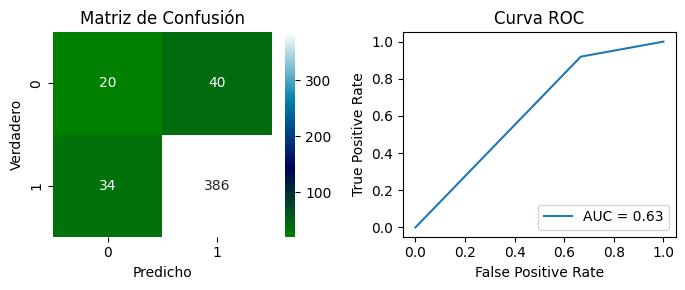

In [23]:
# Visualizaciones modelo Arbol de decisión con GridSearch
print('Métricas modelo Árbol de Desición con GridSearch')
print('Informe de clasificación:')
print(r_A)

# Crear la figura y los subplots
plt.figure(figsize=(7,3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_A, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Randomized SearchCV

In [24]:
# Evaluación modelo Árbol de decisión con Randomized SearchCV

mejor_A = R_A.best_estimator_
y_pred_A1 = mejor_A.predict(X_test)

#Evaluaciones
r_A1 = classification_report(y_test, y_pred_A1 )
matriz_A1 = confusion_matrix(y_test, y_pred_A1 )
fpr, tpr, thresholds = roc_curve(y_test, y_pred_A1 )
roc_auc = auc(fpr, tpr)

Métricas modelo Árbol de decisión con RandomizedSearchCV
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.40      0.35      0.38        60
           1       0.91      0.93      0.92       420

    accuracy                           0.85       480
   macro avg       0.66      0.64      0.65       480
weighted avg       0.85      0.85      0.85       480



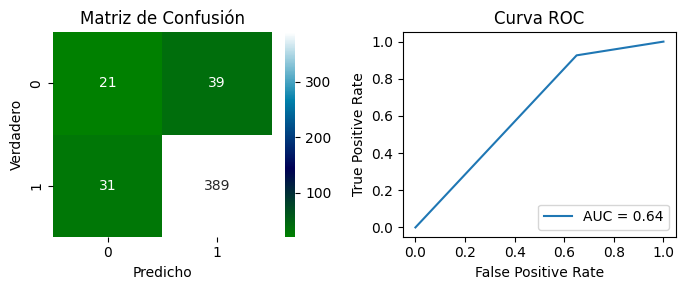

In [25]:
#visualizaciones modelo Árbol de decisión con Randomized SearchCV
print('Métricas modelo Árbol de decisión con RandomizedSearchCV')
print('Informe de clasificación:')
print(r_A1)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_A1, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Optuna

In [26]:
# Definir la función de objetivo para modelo Árbol de decisión
def objective(trial):
    # Hiperparámetros a optimizar
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Definir el modelo con los hiperparámetros sugeridos por Optuna
    arbol_modelo = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocesamiento que ya tienes definido
        ('modelo', DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        ))
    ])

    #Entrenar el modelo Árbol de Decisión
    arbol_modelo.fit(X_train, y_train)

    #Realizar predicciones en el conjunto de prueba
    y_pred_Arbol = arbol_modelo.predict(X_test)

    # Calcular la exactitud
    accuracy_A = accuracy_score(y_test, y_pred_Arbol)

    return accuracy_A


In [27]:
# Crear un estudio de Optuna y optimizar la función objetivo
estudio_A = optuna.create_study(direction='maximize')
estudio_A.optimize(objective, n_trials=50)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(estudio_A.best_params)

# Mostrar la mejor exactitud obtenida
print(f"Mejor exactitud obtenida: {estudio_A.best_value}")

[I 2024-09-19 21:51:11,538] A new study created in memory with name: no-name-1f606097-61f5-4c53-bc70-a8fcfe5dde1f
[I 2024-09-19 21:51:11,606] Trial 0 finished with value: 0.8333333333333334 and parameters: {'max_depth': 30, 'min_samples_split': 12, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8333333333333334.
[I 2024-09-19 21:51:11,673] Trial 1 finished with value: 0.85625 and parameters: {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.85625.
[I 2024-09-19 21:51:11,755] Trial 2 finished with value: 0.8541666666666666 and parameters: {'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.85625.
[I 2024-09-19 21:51:11,846] Trial 3 finished with value: 0.8354166666666667 and parameters: {'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.85625.
[I 2024-09-19 21:51:12,032] Trial 4 finished with value: 0.8541666666666666 and parameters: {'max_d

Mejores hiperparámetros encontrados:
{'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 7}
Mejor exactitud obtenida: 0.85625


Evaluación del modelo con los mejores parámetros encontrados para el modelo Árbol de decisión


Métricas modelo Árbol de Decisión con Optuna
Exactitud del mejor modelo: 0.85625
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.40      0.28      0.33        60
           1       0.90      0.94      0.92       420

    accuracy                           0.86       480
   macro avg       0.65      0.61      0.62       480
weighted avg       0.84      0.86      0.85       480

Matriz de Confusión:
[[ 17  43]
 [ 26 394]]


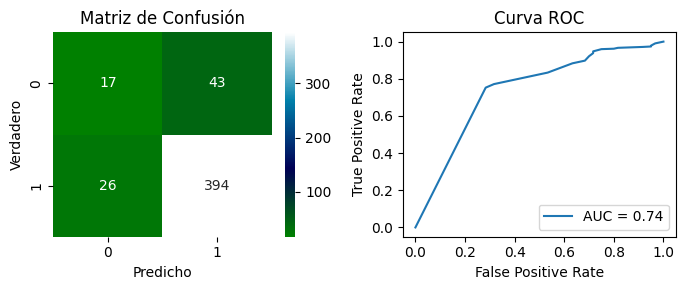

In [28]:
# Obtener el mejor modelo
best_params = estudio_A.best_params

mejor_mArbol= Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocesamiento definido
        ('modelo', DecisionTreeClassifier(**best_params, random_state=42))
])

# Entrenar el mejor modelo
mejor_mArbol.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_predARBOL = mejor_mArbol.predict(X_test)
y_probARBOL = mejor_mArbol.predict_proba(X_test)[:, 1]

# Evaluar el modelo
accuracy_ARBOL = accuracy_score(y_test, y_predARBOL)
print('\nMétricas modelo Árbol de Decisión con Optuna')
print(f'Exactitud del mejor modelo: {accuracy_ARBOL}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predARBOL))

# Matriz de Confusión
conf_matrixA = confusion_matrix(y_test, y_predARBOL)
print('Matriz de Confusión:')
print(conf_matrixA)

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probARBOL)
roc_auc = auc(fpr, tpr)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrixA, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()



Benchmarking con los hiperparámetros hallados a través de GridSearch, Randomized Search CV y Optuna.

Con GridSearch y Randomized Search CV se presenta un rendimiento similar, pero en el caso de GridSearch es desmejorado en la clase '0' con un f1-score más bajo auqneu con la exactitus similar a los otros dos, en cuanto a Randomized Search Cv es equilibrado con ligera mejora de la clase '0' es muy cercano al antes mencionado yaa que presentan exactitud igual; por otro lado, Optuna presenta mejor rendimiento de clase '1' el cual parece ser el más efectivo al optimizar el rendimiento general del modelo presenta un recal y precisión alto.



- # Bagging Classifier

In [29]:
bagging = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('modelo', BaggingClassifier())
])


parametros = {
    'modelo__n_estimators':[20, 40, 80],
    'modelo__max_samples': [0.5, 0.8, 1.2],
    'modelo__max_features': [0.5, 0.8, 1.2]
}

In [30]:
# Gridsearch para modelo Bagging Classifier

g_bag = GridSearchCV(bagging, parametros, cv=5, n_jobs= -1, scoring='accuracy')

g_bag.fit(X_train,y_train)

# Randomized SearchCV  ara modelo Bagging Classifier

R_bag1 = RandomizedSearchCV(bagging, parametros, n_iter=10, scoring= 'accuracy', cv=5, n_jobs= -1, random_state=50)
R_bag1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('numerica',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['CustomerID',
                                                                                'Age',
                                                                                'Income',
                                                                                'ClickThroughRate',
                                                                                'ConversionRate',
                                                                                'WebsiteVisits',
                                                                                'PagesPerVisit',
                                                                                'TimeOnSite',
                                                                                'Soci...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Gender',
                                                                                'CampaignChannel',
                                                                                'CampaignType',
                                                                                'AdvertisingPlatform',
                                                                                'AdvertisingTool'])],
                                                                verbose=True)),
                                             ('modelo', BaggingClassifier())]),
                   n_jobs=-1,
                   param_distributions={'modelo__max_features': [0.5, 0.8, 1.2],
                                        'modelo__max_samples': [0.5, 0.8, 1.2],
                                        'modelo__n_estimators': [20, 40, 80]},
                   random_state=50, scoring='accuracy')

GridSearch

In [31]:
# Evaluación modelo Bagging con GridSearch

mejor_bagging = g_bag.best_estimator_
y_pred_bag = mejor_bagging.predict(X_test)

# Evaluación con reporte de clasificación
r_bagging = classification_report(y_test, y_pred_bag)
matriz_bag = confusion_matrix(y_test, y_pred_bag)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bag)
roc_auc = auc(fpr, tpr)

Métricas modelo Bagging con GridSearch
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.12      0.20        60
           1       0.89      0.99      0.94       420

    accuracy                           0.88       480
   macro avg       0.76      0.55      0.57       480
weighted avg       0.86      0.88      0.84       480



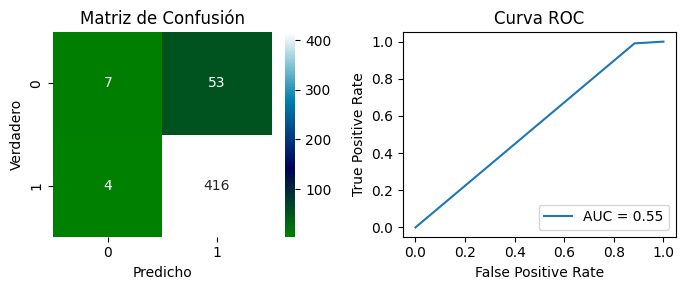

In [32]:
# Visualizaciones modelo Bagging con GridSearch
print('Métricas modelo Bagging con GridSearch')
print('Informe de clasificación:')
print(r_bagging)

# Crear la figura y los subplots
plt.figure(figsize=(7,3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_bag, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Randomized SearchCV

In [33]:
# Evaluación modelo Bagging con Randomized SearchCV

mejor_bagging2 = R_bag1.best_estimator_
y_pred_bag2 = mejor_bagging2.predict(X_test)

#Evaluaciones
r_bagging2 = classification_report(y_test, y_pred_bag2)
matriz_bag2 = confusion_matrix(y_test, y_pred_bag2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bag2)
roc_auc = auc(fpr, tpr)

Métricas modelo Bagging con RandomizedSearchCV
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.56      0.15      0.24        60
           1       0.89      0.98      0.93       420

    accuracy                           0.88       480
   macro avg       0.73      0.57      0.59       480
weighted avg       0.85      0.88      0.85       480



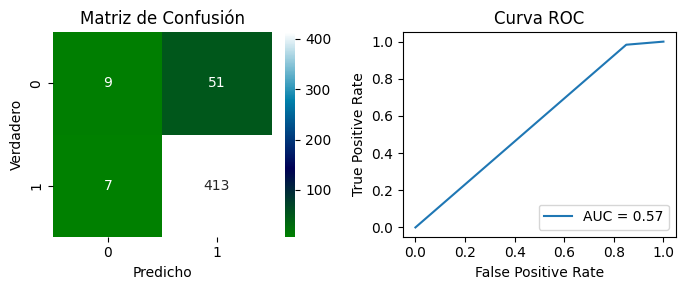

In [34]:
#visualizaciones modelo Bagging con Randomized SearchCV
print('Métricas modelo Bagging con RandomizedSearchCV')
print('Informe de clasificación:')
print(r_bagging2)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_bag2, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Optuna

In [41]:
# Definir la función objetivo para Optuna
def objective(trial):
  # Hiperparámetros a optimizar
  max_depth = trial.suggest_int('max_depth', 1, 30)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

  # Hiperparámetros del BaggingClassifier
  n_estimators = trial.suggest_int('n_estimators', 10, 100)  # Número de estimadores
  max_samples = trial.suggest_float('max_samples', 0.5, 1.0)  # Porcentaje de muestras
  max_features = trial.suggest_float('max_features', 0.5, 1.0)  # Porcentaje de características


  # Definir el modelo base (DecisionTreeClassifier) con los hiperparámetros sugeridos
  base_estimator = DecisionTreeClassifier(
  max_depth=max_depth,
  min_samples_split=min_samples_split,
  min_samples_leaf=min_samples_leaf,
  random_state=42
    )

  # Definir el modelo con los hiperparámetros sugeridos por Optuna

  bagging1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('modelo', BaggingClassifier(
        base_estimator=base_estimator,
        n_estimators=n_estimators,
        max_samples=max_samples,
        max_features=max_features,
        bootstrap=True,
        random_state=42
    ))
  ])

  #Entrenar el modelo Árbol de Decisión
  bagging1.fit(X_train, y_train)

  #Realizar predicciones en el conjunto de prueba
  y_pred_B = bagging1.predict(X_test)

  # Calcular la exactitud
  accuracy_B = accuracy_score(y_test, y_pred_B)

  return accuracy_B

In [42]:
# Crear un estudio de Optuna y optimizar la función objetivo
estudio_B = optuna.create_study(direction='maximize')
estudio_B.optimize(objective, n_trials=50)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(estudio_B.best_params)

# Mostrar la mejor exactitud obtenida
print(f"Mejor exactitud obtenida: {estudio_B.best_value}")

[I 2024-09-19 22:01:26,725] A new study created in memory with name: no-name-bba6a4c7-7794-493d-9ba5-ff13517e8440
[I 2024-09-19 22:01:30,415] Trial 0 finished with value: 0.8770833333333333 and parameters: {'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 4, 'n_estimators': 65, 'max_samples': 0.6300965467409083, 'max_features': 0.9257041737183326}. Best is trial 0 with value: 0.8770833333333333.
[I 2024-09-19 22:01:30,763] Trial 1 finished with value: 0.875 and parameters: {'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 3, 'n_estimators': 25, 'max_samples': 0.6445965445817308, 'max_features': 0.8117061291629051}. Best is trial 0 with value: 0.8770833333333333.
[I 2024-09-19 22:01:32,024] Trial 2 finished with value: 0.875 and parameters: {'max_depth': 24, 'min_samples_split': 17, 'min_samples_leaf': 4, 'n_estimators': 99, 'max_samples': 0.6320718876632341, 'max_features': 0.9443864076902142}. Best is trial 0 with value: 0.8770833333333333.
[I 2024-09-19 22:01

Mejores hiperparámetros encontrados:
{'max_depth': 24, 'min_samples_split': 8, 'min_samples_leaf': 3, 'n_estimators': 28, 'max_samples': 0.6220167434312395, 'max_features': 0.8568916940325327}
Mejor exactitud obtenida: 0.8875



Métricas modelo Bagging Classifier con Optuna
Exactitud del mejor modelo: 0.8729166666666667
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.48      0.23      0.31        60
           1       0.90      0.96      0.93       420

    accuracy                           0.87       480
   macro avg       0.69      0.60      0.62       480
weighted avg       0.85      0.87      0.85       480

Matriz de Confusión:
[[ 14  46]
 [ 15 405]]


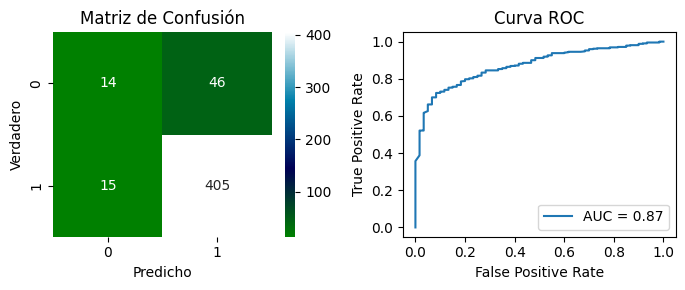

In [59]:
# Obtener el mejor modelo
best_params = estudio_A.best_params

# Definir el modelo base con los mejores parámetros obtenidos de Optuna
modelo_base = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

mejor_B= Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocesamiento definido
        ('modelo', BaggingClassifier(base_estimator=modelo_base, random_state=42))
])

# Entrenar el mejor modelo
mejor_B.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_predB = mejor_B.predict(X_test)
y_probB = mejor_B.predict_proba(X_test)[:, 1]

# Evaluar el modelo
accuracy_B = accuracy_score(y_test, y_predB)
print('\nMétricas modelo Bagging Classifier con Optuna')
print(f'Exactitud del mejor modelo: {accuracy_B}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predB))

# Matriz de Confusión
conf_matrixB = confusion_matrix(y_test, y_predB)
print('Matriz de Confusión:')
print(conf_matrixB)

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probB)
roc_auc = auc(fpr, tpr)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrixB, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Benchmarking con los hiperparámetros hallados a través de GridSearch, Randomized Search CV y Optuna modelo Bagging Classifier.


gridSearch ofrec una exactitud  muy buena global de 0.88, pero es deficiente en la clase '0' con recall bajo de (0.12), en RandomizedSearchCV es de similar exactitud con una tendencia de mejora algo baja en la detección de la clase '0' con un recall de 0.15; en Optuna se resenta una ligera disminución en la exactitud (0.87) aunque con mejora en rendimiento en la detección de la clase '0' (recall 0.23) esto hace que sea una opción con resultados más equilibrados si lo que se busca son reusltados con tendencia a la mejora de la clase minoritaria.


# XGB Classifier

In [45]:
pip install xgboost

In [46]:
import xgboost as xgb
from xgboost import XGBClassifier

In [47]:
# Deifnición del modelo XGB Classifier

XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('modelo', (XGBClassifier()))
])

parametro= {
    'modelo__n_estimators': [80, 10, 120],
    'modelo__learning_rate': [0.01, 0.1, 0.2],
    'modelo__max_depth': [8, 10, 15],
    'modelo__subsample': [0.5, 0.8, 1.0],
    'modelo__colsample_bytree': [0.5, 0.8, 1.0],
    'modelo__gamma': [0, 0.1, 0.3]
}

GridSearch

In [48]:
# optimización con GridSearch
g_XGB = GridSearchCV(estimator=XGB, param_grid=parametros,scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
g_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('numerica',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CustomerID',
                                                                          'Age',
                                                                          'Income',
                                                                          'ClickThroughRate',
                                                                          'ConversionRate',
                                                                          'WebsiteVisits',
                                                                          'PagesPerVisit',
                                                                          'TimeOnSite',
                                                                          'SocialShar...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'modelo__max_features': [0.5, 0.8, 1.2],
                         'modelo__max_samples': [0.5, 0.8, 1.2],
                         'modelo__n_estimators': [20, 40, 80]},
             scoring='accuracy', verbose=1)

In [49]:
# Evaluación GridSearch modelo XGB Classifier

m_XGB = g_XGB.best_estimator_
y_pred_XGB = m_XGB.predict(X_test)

# Métricas de evaluación con GridSearch

r_XGB = classification_report(y_test, y_pred_XGB)
matriz_XGB = confusion_matrix(y_test, y_pred_XGB)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_XGB)
roc_auc = auc(fpr, tpr)

Métricas modelo XGB Classifier con GridSearchCV
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.68      0.35      0.46        60
           1       0.91      0.98      0.94       420

    accuracy                           0.90       480
   macro avg       0.80      0.66      0.70       480
weighted avg       0.88      0.90      0.88       480



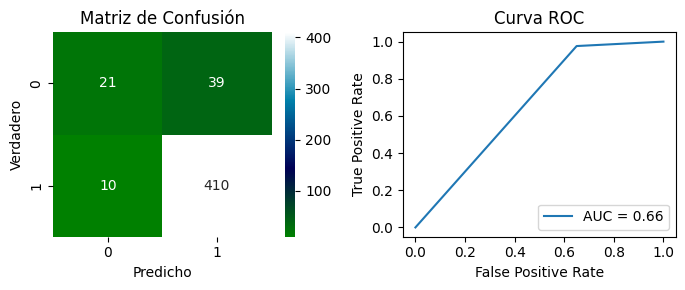

In [50]:
# Visualizaciones modelo Random XGB Classifier
print('Métricas modelo XGB Classifier con GridSearchCV')
print('Informe de clasificación:')
print(r_XGB)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_XGB, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

RandomizedSearchCV

In [51]:
# Optimización con RandomizedSearchCV
random_XGB = RandomizedSearchCV(estimator=XGB, param_distributions=parametros, scoring='accuracy', cv=5, verbose=1,
                                n_jobs=-1, n_iter=20, random_state=36)
random_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('numerica',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['CustomerID',
                                                                                'Age',
                                                                                'Income',
                                                                                'ClickThroughRate',
                                                                                'ConversionRate',
                                                                                'WebsiteVisits',
                                                                                'PagesPerVisit',
                                                                                'TimeOnSite',
                                                                                'Soci...
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'modelo__max_features': [0.5, 0.8, 1.2],
                                        'modelo__max_samples': [0.5, 0.8, 1.2],
                                        'modelo__n_estimators': [20, 40, 80]},
                   random_state=36, scoring='accuracy', verbose=1)

In [52]:
# Evaluación RandomizedSearchCV modelo XGB Classifier

m_XGB1 = random_XGB.best_estimator_
y_pred_XGB1 = m_XGB1.predict(X_test)

# Métricas de evaluación con RandomizedSearchCV

r_XGB1 = classification_report(y_test, y_pred_XGB1)
matriz_XGB1 = confusion_matrix(y_test, y_pred_XGB1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_XGB1)
roc_auc = auc(fpr, tpr)

Métricas modelo XGB Classifier con RandomizedSearchCV
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.68      0.35      0.46        60
           1       0.91      0.98      0.94       420

    accuracy                           0.90       480
   macro avg       0.80      0.66      0.70       480
weighted avg       0.88      0.90      0.88       480



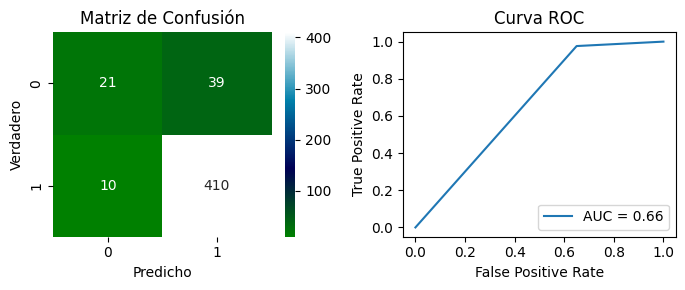

In [53]:
# Visualizaciones modelo Random XGB Classifier
print('Métricas modelo XGB Classifier con RandomizedSearchCV')
print('Informe de clasificación:')
print(r_XGB1)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_XGB1, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Optuna

In [57]:
# Definir la función objetivo para Optuna
def objective(trial):
    # Espacio de hiperparámetros a optimizar
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
    }

    # Crear el pipeline con escalado de características
    XGBClass = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('xgb', XGBClassifier(**param, use_label_encoder=False, eval_metric='logloss', random_state=42))
    ])

    # Validación cruzada para evaluar el rendimiento del modelo
    score = cross_val_score(XGBClass, X_train, y_train, cv=5, scoring='accuracy').mean()

    return score

In [58]:
# Crear un estudio de Optuna para maximizar la precisión
estudio_X = optuna.create_study(direction='maximize')
estudio_X.optimize(objective, n_trials=50)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(estudio_X.best_params)

# Mostrar la mejor exactitud obtenida
print(f"Mejor exactitud obtenida: {estudio_X.best_value}")

[I 2024-09-19 22:15:15,762] A new study created in memory with name: no-name-d5992be6-af4f-4a14-969d-915ae1e2b24c
[I 2024-09-19 22:15:16,860] Trial 0 finished with value: 0.8794642857142856 and parameters: {'n_estimators': 625, 'max_depth': 15, 'learning_rate': 0.12755547750151217, 'subsample': 0.5360939017875954, 'colsample_bytree': 0.8406810883241991, 'gamma': 2.9470438390921054, 'reg_alpha': 4.896795083738051, 'reg_lambda': 2.0705489715022334}. Best is trial 0 with value: 0.8794642857142856.
[I 2024-09-19 22:15:17,425] Trial 1 finished with value: 0.8776785714285713 and parameters: {'n_estimators': 223, 'max_depth': 5, 'learning_rate': 0.1874388952615965, 'subsample': 0.9045822514485582, 'colsample_bytree': 0.5528718909414789, 'gamma': 3.4645657331929414, 'reg_alpha': 4.235180900497472, 'reg_lambda': 4.068172291249369}. Best is trial 0 with value: 0.8794642857142856.
[I 2024-09-19 22:15:18,249] Trial 2 finished with value: 0.8767857142857143 and parameters: {'n_estimators': 461, 'ma

Mejores hiperparámetros encontrados:
{'n_estimators': 734, 'max_depth': 7, 'learning_rate': 0.20164065541353804, 'subsample': 0.6470326174716939, 'colsample_bytree': 0.6056700951964575, 'gamma': 1.776312021735573, 'reg_alpha': 0.5464316264892147, 'reg_lambda': 3.099091001340596}
Mejor exactitud obtenida: 0.9035714285714287



Métricas modelo XGB Classifier con Optuna
Exactitud del mejor modelo: 0.9020833333333333
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.70      0.38      0.49        60
           1       0.92      0.98      0.95       420

    accuracy                           0.90       480
   macro avg       0.81      0.68      0.72       480
weighted avg       0.89      0.90      0.89       480

Matriz de Confusión:
[[ 23  37]
 [ 10 410]]


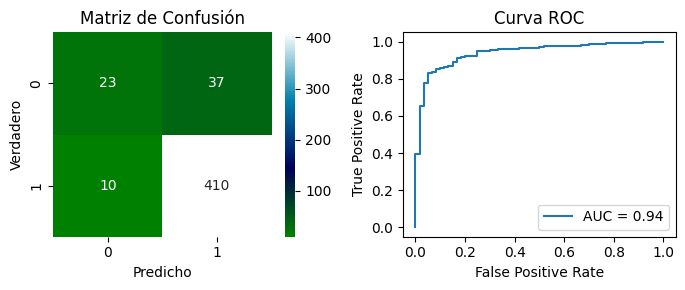

In [61]:
# Obtener el mejor modelo
best_params = estudio_X.best_params

mejor_XGB1= Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocesamiento definido
        ('modelo', XGBClassifier(**best_params, random_state=42))
])

# Entrenar el mejor modelo
mejor_XGB1.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_XGB = mejor_XGB1.predict(X_test)
y_prob_XGB = mejor_XGB1.predict_proba(X_test)[:, 1]

# Evaluar el modelo
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
print('\nMétricas modelo XGB Classifier con Optuna')
print(f'Exactitud del mejor modelo: {accuracy_XGB}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred_XGB))

# Matriz de Confusión
conf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)
print('Matriz de Confusión:')
print(conf_matrix_XGB)

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_XGB)
roc_auc = auc(fpr, tpr)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_XGB, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Benchmarking con los hiperparámetros hallados a través de GridSearch, Randomized Search CV y Optuna.

GridSearch y RandomizedSearchCv tienen el mismo rendimiento, exactitud y recall para la clase '1' son muy altos, pero la detección de la clase '0' es limitada.

Optuna ofrece una mejora ligera en la exactitud (0.902) y un mejor equlibrio en la detección de la clase '0', la precisión y Fi-score para la clase '0 son superiores al ser comparados con GridSearchCV y RandomizedSearchCV, el recall para la clase '0' también es superior esto indica que Optuna logró encontrar una mejor combinación de hiperparámetros para manejar la clase minoritaria.


Como conlusión, XGB Classifier optimizado con optuna es el más viable de los tres  modelos, ofrece la mejor exactitud general y un equilibrio reestructurado en la detección de la clase '0', esto es particularmente relevante en problemas de clasificación desbalanceada, en donde es conveniente no sólo tener una alta exactitud sino también un buen rendimiento de la clase menos representada.